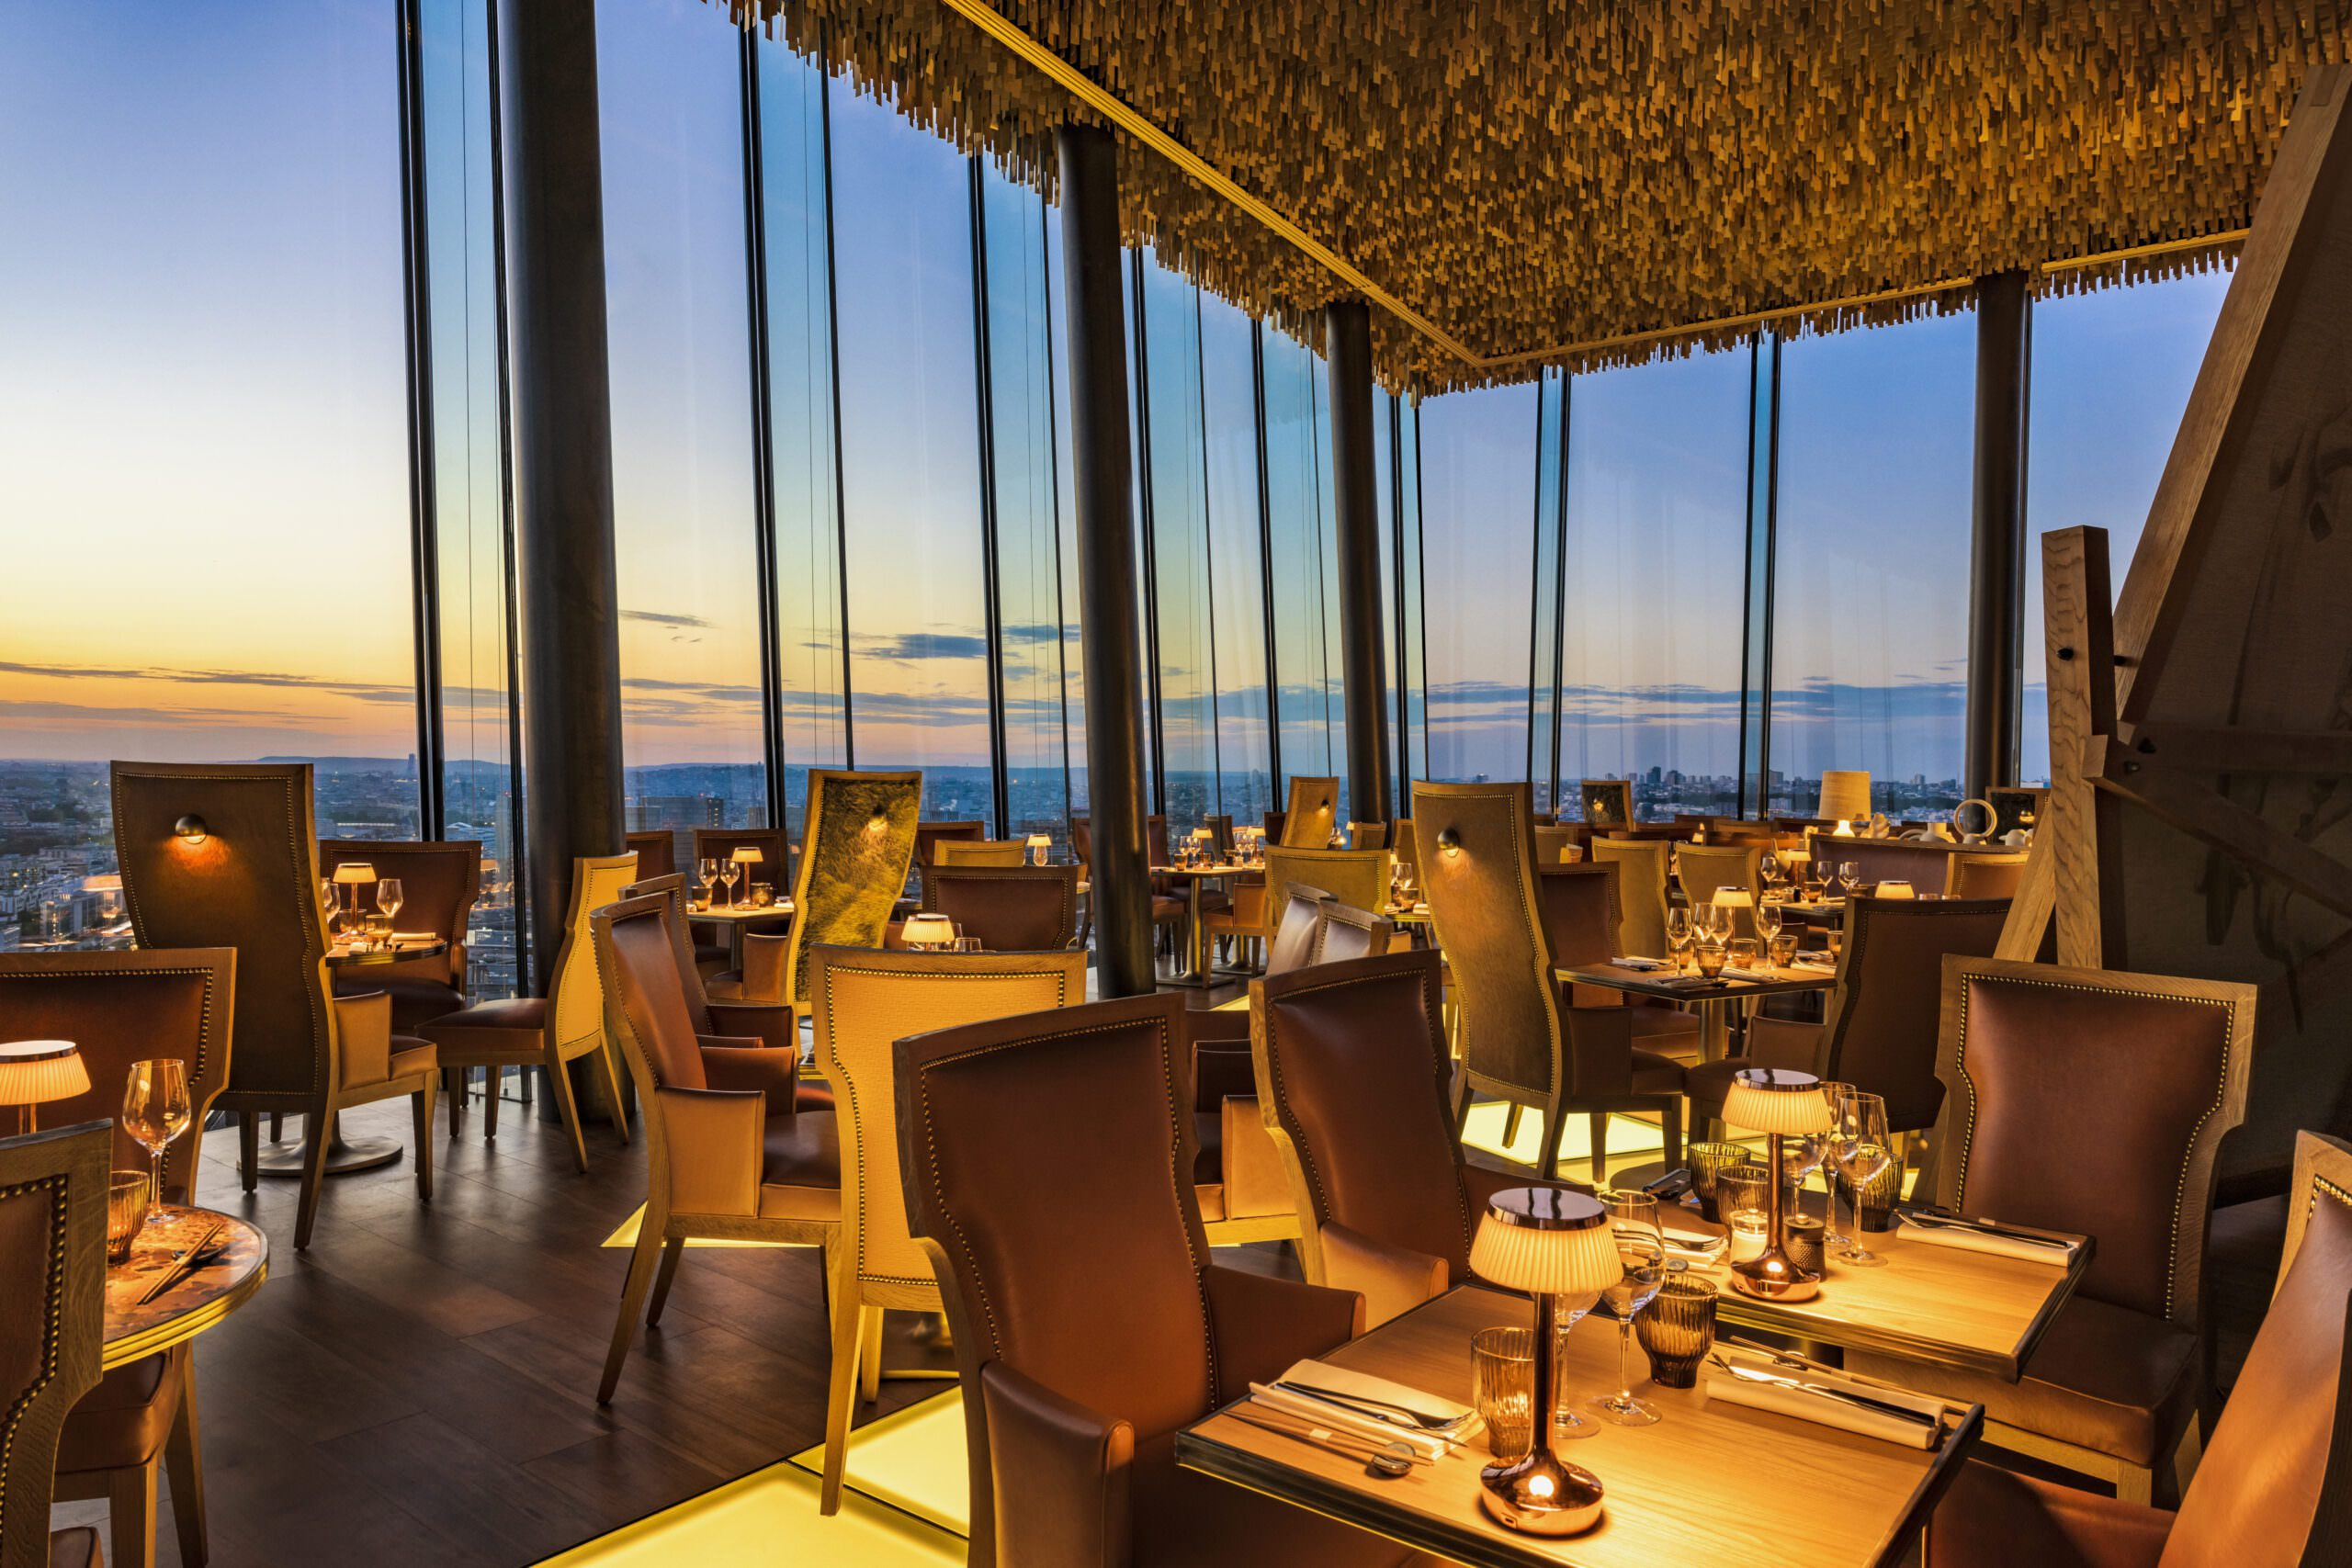

In [1]:
from IPython.display import Image
Image(filename='image.jpg') 

## Dataset Details
Zomato, the online food app, has reached out to us to help them to predict how good or bad a restaurant will turn out in the future. So that, they can take a decision to include the restaurant in their app or remove it.

They have shared the data of 9551 restaurants from all over the world which are currently present in the Zomato App. It contains the details about the restaurants and what rating it achieved finally.

## Problem Statement
Our task is to create a machine learning model which can predict the Rating of a restaurant based on its characteristics.



### The flow of the case study is as below:

- Reading the data in python
- Defining the problem statement
- Identifying the Target variable
- Looking at the distribution of Target variable
- Basic Data exploration
- Feature Engineering
- Rejecting useless columns
- Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
- Feature Selection based on data distribution
- Outlier treatment
- Missing Values treatment
- Visual correlation analysis
- Statistical correlation analysis (Feature Selection)
- Converting data to numeric for ML
- Sampling and K-fold cross validation
- Trying multiple Regression algorithms
- Selecting the best Model
- Deploying the best model in production

## Data description
### The business meaning of each column in the data is as below

- **Restaurant ID:** The id for each restaurant
- **Restaurant Name:** The brand/restaurant name
- **Country Code:** In which country the restaurant is operating
- **City:** In which city the restaurant is operating
- **Address:** What is the address of the restaurant
- **Locality:** What is the locality of the restaurant
- **Locality Verbose:** Detailed locality description
- **Longitude:** GPS longitude location
- **Latitude:** GPS latitude location
- **Cuisines:** Various type of food offered
- **Currency:** The business currency
- **Has Table booking:** Is advance table booking facility available?
- **Has Online delivery:** Does they take online food orders?
- **Is delivering now:** Is is open now?
- **Switch to order menu:** Whether switch to order menu is available?
- **Price range:** The price range of the restaurant
- **Votes:** The number of people who voted for the rating
- **Average Cost for two:** The typical cost for two people
- **Rating:** The final rating of the restaurant

In [2]:
# supressing the warning messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading the dataset
import numpy as np
import pandas as pd

zomato_data = pd.read_csv('ZomatoData.csv', encoding='latin')
print(f"Before removing duplicate records: Shape: {zomato_data.shape}")

# removing if any duplicate values are present
zomato_data = zomato_data.drop_duplicates()
print(f"After removing duplicate records: Shape: {zomato_data.shape}")



Before removing duplicate records: Shape: (9551, 19)
After removing duplicate records: Shape: (9551, 19)


# Observation:
There is no duplicate records present in the dataset.

In [4]:
zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


### Defining the problem statement:
Create a Predictive model which can predict the future Rating of a restaurant
Target Variable: **Rating**
Predictors: location, menu, cost etc.

**Rating=1 Worst**    
**Rating=5 Best**
### Determining the type of Machine Learning
Based on the problem statement we can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.

### Looking at the distribution of Target variable
- If target variable's distribution is too skewed then the predictive modeling will not be possible.
- Bell curve is desirable but slightly positive skew or negative skew is also fine
- When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<Axes: >

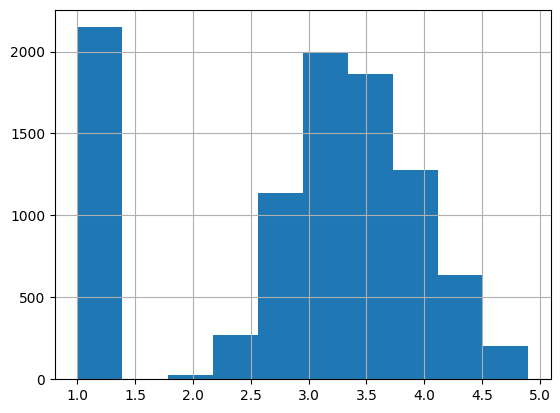

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# creating a Bar Plot as Target variable (rate) is continuous
zomato_data['Rating'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

## Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. We must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, we will ask, does this column affect the rating of the Restaurant? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python

- head() : This helps to see a few sample rows of the data
- info() : This provides the summarized information of the data
- describe() : This provides the descriptive statistical details of the data
- nunique(): This helps us to identify if a column is categorical or continuous

In [8]:
# looking at sample rowa in data
zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [9]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [10]:
# Looking at the descriptive statistics of the data
zomato_data.describe(include='all')

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551.000000,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,12,2,2,2,1,NaN,NaN,NaN,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,NaN,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,8652,8393,7100,9517,9551,NaN,NaN,NaN,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,NaN,NaN,NaN,NaN,NaN,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,NaN,NaN,NaN,NaN,NaN,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,131.000000,700.000000,3.700000


In [11]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
zomato_data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                   1012
Average Cost for two     140
Rating                    33
dtype: int64

## Basic Data Exploration Results
Based on the basic exploration above, we can now create a simple report of the data, noting down our observations regading each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

- Restaurant ID: Qualitative. Rejected.
- Restaurant Name: Qualitative. Rejected.
- Country Code: Categorical. Selected.
- City: Categorical. Rejected. Too many unique levels, hence it will cause high dimensionality
- Address: Qualitative. Rejected.
- Locality: Qualitative. Rejected.
- Locality Verbose: Qualitative. Rejected.
- Longitude: Continuous. Selected. This represents the location of restaurant
- Latitude: Continuous. Selected. This represents the location of restaurant
- Cuisines: Qualitative. Rejected. A new feature can be engineered from it.
- Currency: Categorical. Selected.
- Has Table booking: Categorical. Selected.
- Has Online delivery: Categorical. Selected.
- Is delivering now: Categorical. Selected.
- Switch to order menu: Categorical. Selected.
- Price range: Categorical. Selected.
- Votes: Continuous. Selected.
- Average Cost for two: Continuous. Selected.
- Rating: Continuous. Selected. This is the Target Variable!

## Feature Engineering
Some of the columns cannot be used directly for machine learning like Dates, addresses, etc. because these are qualitative in nature. Hence every row has a different string value, Hence the ML algorithms cannot learn anything from them because each row has a different description. In simple terms, no general rules can be created from such columns.

However, we can extract some information from these columns, which can be used in ML. Like from a date column we can take out month, week, quarter etc, which becomes categorical feature.

Similarly we can extract some repetitive information from address like zip codes, locality etc. however if the number of unique values is too high in them (more than 50) then it creates trouble later for the ML algorithm as the data dimensionality increases while converting such columns to dummy variables.

In this data the "Cuisines" column cannot be used directly because it will generate 1825 dummy variables!! Hence, we can count the number of cuisines offered, which can be a number, hence it can be used in ML.

In [12]:
# Function to return the count of cuisines form the dataset
def CuisineCounter(feature_column:str):
    cuisine_count:str = len(str(feature_column).split(','))
    return cuisine_count
        

In [13]:
# Creating a new feature in data
# We will further explore the new feature just like other features
zomato_data['Cuisine_Count'] = zomato_data['Cuisines'].apply(CuisineCounter)
zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating,Cuisine_Count
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


In [14]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['Restaurant ID', 'Restaurant Name','City','Address',
                  'Locality', 'Locality Verbose','Cuisines']
zomato_data.drop(UselessColumns, axis=1, inplace=True)

In [15]:
zomato_data.head()

,Country Code,Longitude,Latitude,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating,Cuisine_Count
0,162,121.027535,14.565443,Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,162,121.014101,14.553708,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,162,121.056831,14.581404,Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,162,121.056475,14.585318,Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,162,121.057508,14.584450,Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


## Visual Exploratory Data Analysis
Categorical variables: Bar plot
Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted seven categorical predictors in the data

Categorical Predictors: 'Country Code', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu','Price range'

We use bar charts to see how the data is distributed for these categorical columns.

In [16]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

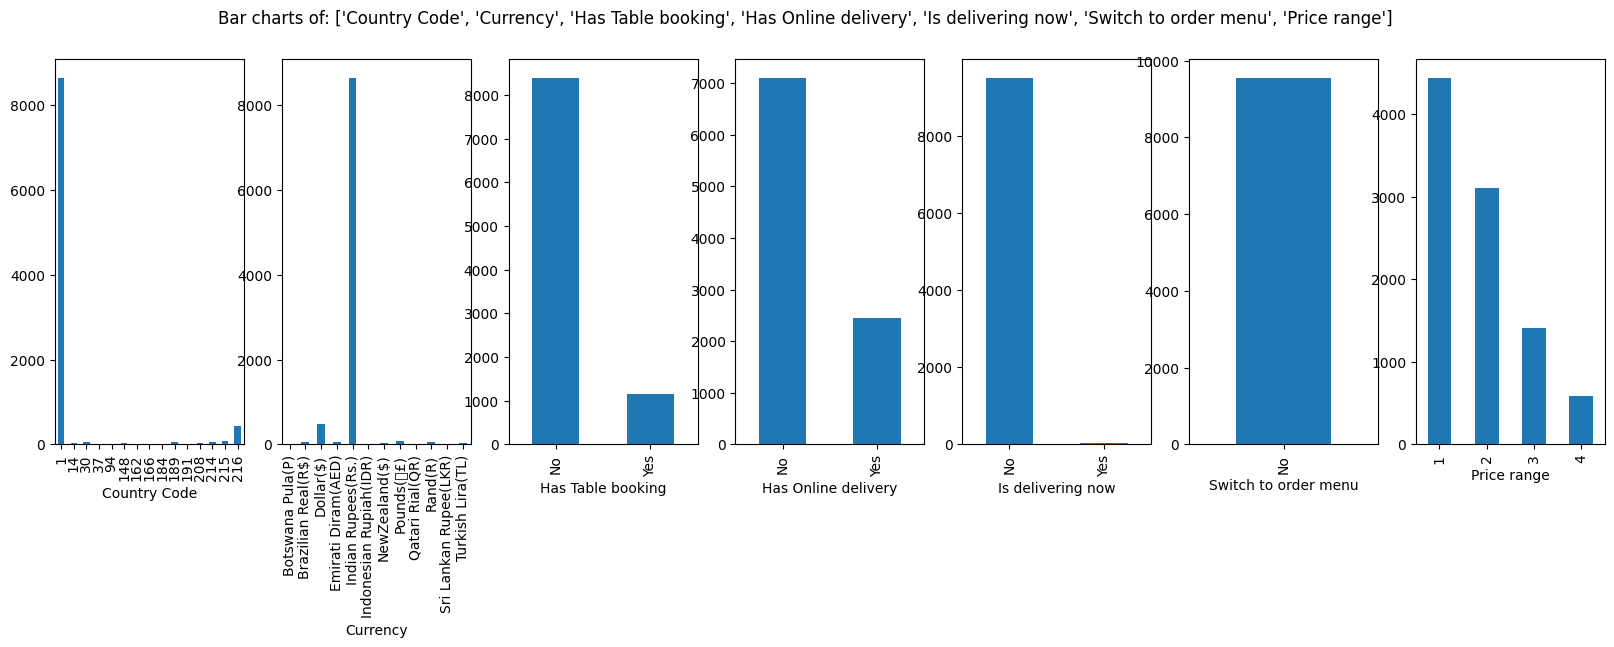

In [17]:
# Calling the function
PlotBarCharts(inpData=zomato_data, colsToPlot=[
    'Country Code', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now',
    'Switch to order menu','Price range'])

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, "Country Code", "Currency", "is delivering now" and "Switch to order menu" are too skewed. There is just one bar which is dominating and other categories have very less rows or there is just one value only. Such columns are not correlated with the target variable because there is no information to learn. The algorithms cannot find any rule like when the value is this then the target variable is that.

Selected Categorical Variables: Only three categorical variables are selected for further analysis.

**'Has Table booking', 'Has Online delivery', 'Price range'**

## Visualize distribution of all the Continuous Predictor variables in the data using histograms

Based on the Basic Data Exploration, There are four continuous predictor variables ''Longitude', 'Latitude','Votes', and 'Average Cost for two'

array([[<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Votes'}>,
        <Axes: title={'center': 'Average Cost for two'}>]], dtype=object)

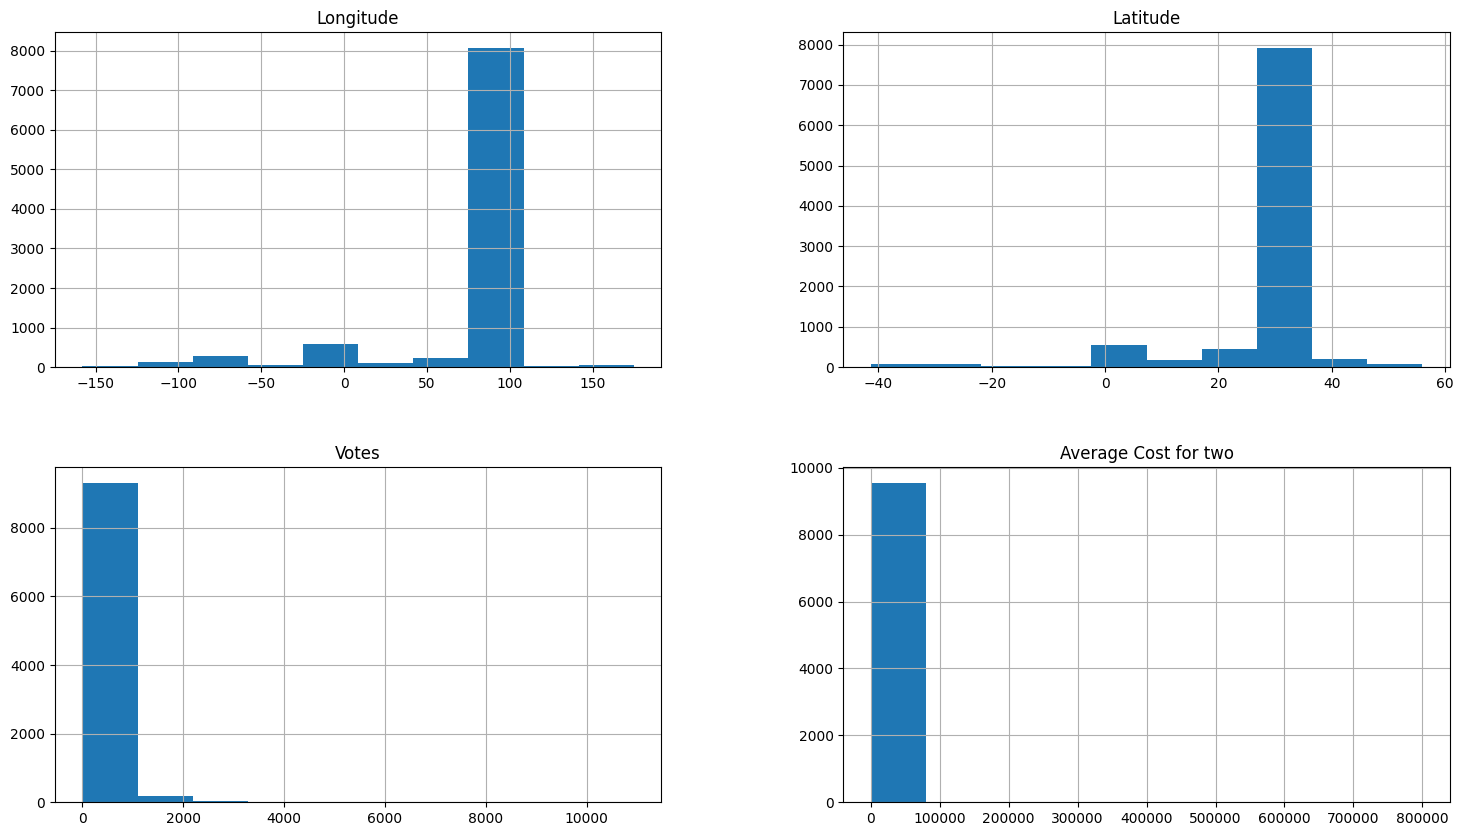

In [18]:
# Plotting histograms of multiple columns together
zomato_data.hist(['Longitude', 'Latitude', 
                 'Votes', 'Average Cost for two'], figsize=(18,10))

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Votes", there are around 9000 rows in data that has a vote value between 0 to 1000.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

- Longitude : Selected. The distribution is good.
- Latitude: Selected. The distribution is good.
- Votes: Selected. Outliers seen beyond 300000, need to treat them.
- Average Cost for two: Selected. Outliers seen beyond 4000, need to treat them.

## Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

- Option-1: Delete the outlier Records. Only if there are just few rows lost.
- Option-2: Impute the outlier values with a logical business value
Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

### Replacing outliers for 'Votes'

In [19]:
# Finding nearest values to 4000 mark
zomato_data['Votes'][zomato_data['Votes']<4000].sort_values(ascending=False)

7863    3986
821     3848
3992    3697
3119    3591
1861    3569
        ... 
4801       0
4803       0
4805       0
4807       0
4784       0
Name: Votes, Length: 9532, dtype: int64

In [20]:
# Find the number of records which are greater than 4000 mark
len(zomato_data['Votes'][zomato_data['Votes']>4000])

19

In [21]:
# Replacing outliers with nearest possibe value
zomato_data['Votes'][zomato_data['Votes']>4000] = 3986

In [22]:
len(zomato_data['Votes'][zomato_data['Votes']>4000])

0

### Replacing outliers for 'Average Cost for two'

In [23]:
# Finding nearest values to 50000 mark
zomato_data['Average Cost for two'][zomato_data['Average Cost for two']<50000].sort_values(ascending=False)

7543    8000
4088    7000
4087    6500
7494    6000
7538    6000
        ... 
85         0
87         0
240        0
397        0
9242       0
Name: Average Cost for two, Length: 9530, dtype: int64

Above result shows the nearest logical value is 8000, hence, replacing any value above 50000 with it.

In [24]:
# Find the number of records which are greater than 50000 mark
len(zomato_data['Average Cost for two'][zomato_data['Average Cost for two']>50000])

21

In [25]:
zomato_data['Average Cost for two'][zomato_data['Average Cost for two']>50000] = 8000

In [26]:
len(zomato_data['Average Cost for two'][zomato_data['Average Cost for two']>50000])

0

## Visualizing distribution after outlier treatment
The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<Axes: title={'center': 'Votes'}>,
        <Axes: title={'center': 'Average Cost for two'}>]], dtype=object)

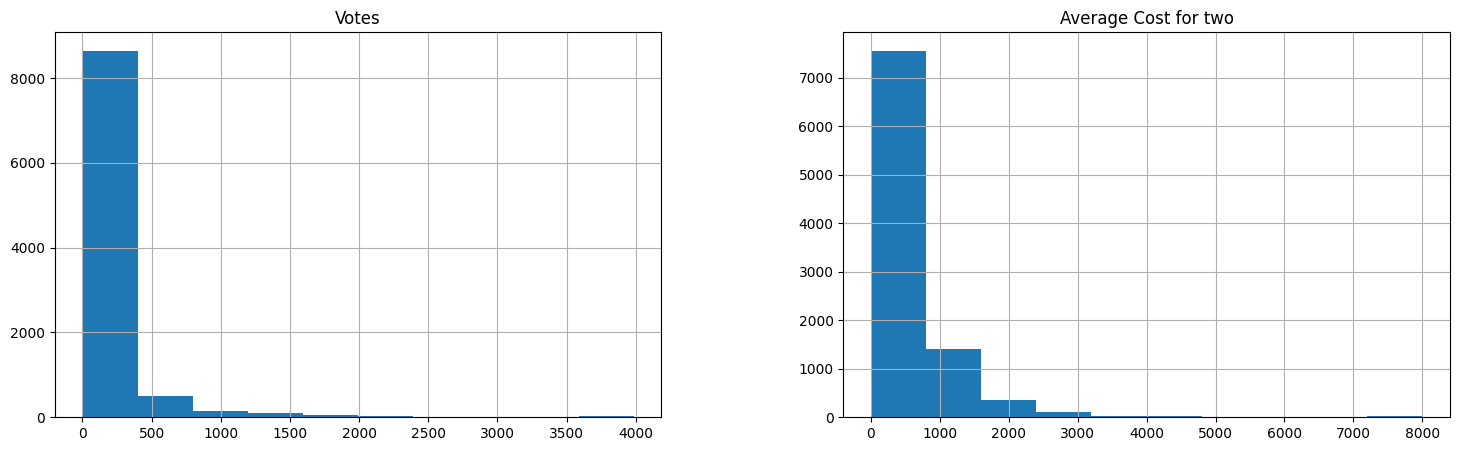

In [27]:
zomato_data.hist(['Votes','Average Cost for two'],figsize=(18,5))

## Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

- Delete the missing value rows if there are only few records
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables
- Interpolate the values based on nearby values
- Interpolate the values based on business logic

In [28]:
# Finding how many missing values are there for each column
zomato_data.isnull().sum()

Country Code            0
Longitude               0
Latitude                0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
Cuisine_Count           0
dtype: int64

No missing values in the dataset

## Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

### Visual exploration of relationship between variables
- Continuous Vs Continuous ---- Scatter Plot
- Categorical Vs Continuous---- Box Plot
- Categorical Vs Categorical---- Grouped Bar Plots
### Statistical measurement of relationship strength between variables
- Continuous Vs Continuous ---- Correlation matrix
- Categorical Vs Continuous---- ANOVA test
- Categorical Vs Categorical--- Chi-Square test


In this case study the Target variable is Continuous, hence below two scenarios will be present

- Continuous Target Variable Vs Continuous Predictor
- Continuous Target Variable Vs Categorical Predictor

## Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

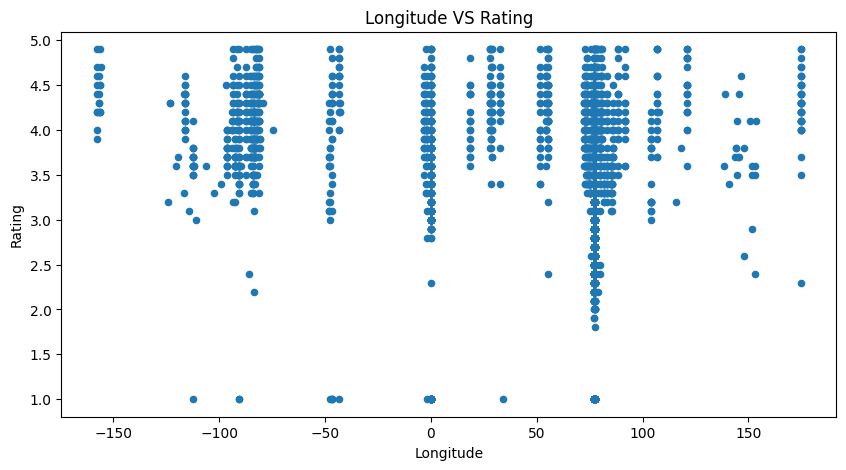

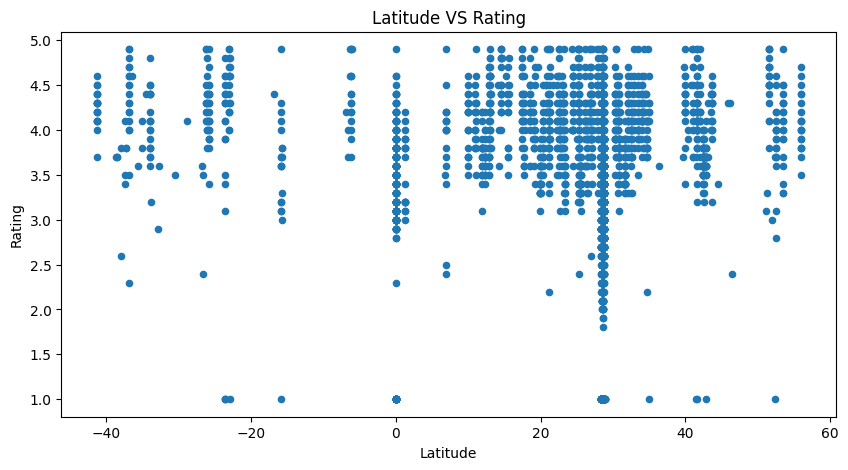

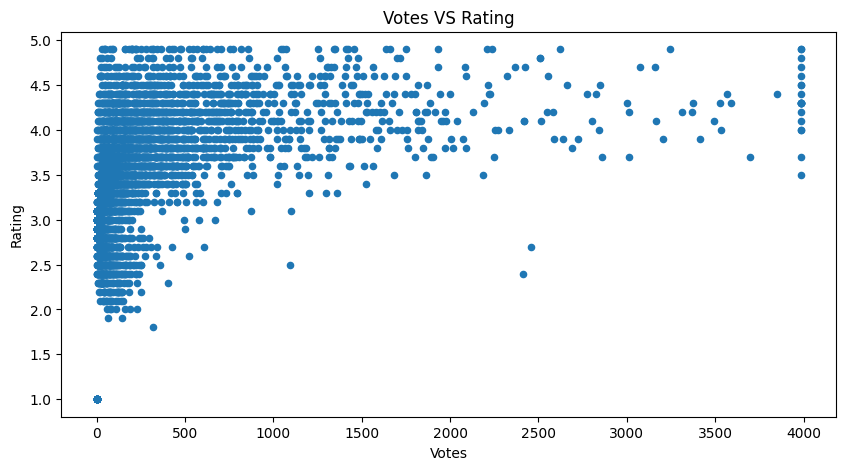

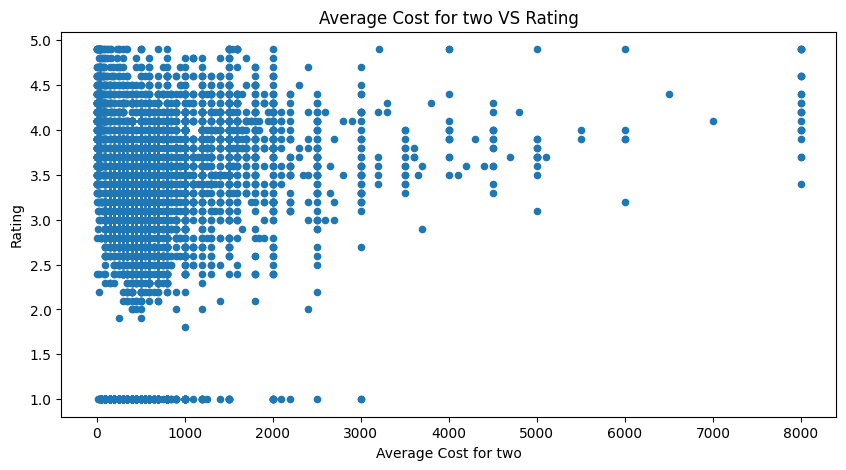

In [29]:
ContinuousCols=['Longitude', 'Latitude', 'Votes', 'Average Cost for two']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    zomato_data.plot.scatter(x=predictor, y='Rating', figsize=(10,5), title=predictor+" VS "+ 'Rating')

## Scatter charts interpretation
What should you look for in these scatter charts?

Trend. We should try to see if there is a visible trend or not. There could be three scenarios

- Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

- Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

- No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value.

## Statistical Feature Selection (Continuous Vs Continuous) using Correlation value
Pearson's correlation coefficient can simply be calculated as the covariance between two features  x
  and  y
  (numerator) divided by the product of their standard deviations (denominator):



This value can be calculated only between two numeric columns
- Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
- Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
- Correlation near {0} means No relationship, the scatter plot will show no clear trend.
- If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
- We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [30]:
# Calculating correlation matrix
ContinuousCols=['Rating','Longitude', 'Latitude', 'Votes', 'Average Cost for two']

# Creating the correlation matrix
corrData = zomato_data[ContinuousCols].corr()
corrData

,Rating,Longitude,Latitude,Votes,Average Cost for two
Rating,1.000000,-0.145930,-0.019806,0.385249,0.248981
Longitude,-0.145930,1.000000,0.043207,-0.101381,0.210272
Latitude,-0.019806,0.043207,1.000000,-0.019687,-0.064748
Votes,0.385249,-0.101381,-0.019687,1.000000,0.245662
Average Cost for two,0.248981,0.210272,-0.064748,0.245662,1.000000


In [31]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected like in this case
corrData['Rating'][abs(corrData['Rating'])>0.2]

Rating                  1.000000
Votes                   0.385249
Average Cost for two    0.248981
Name: Rating, dtype: float64

Final selected Continuous columns:

'Votes', 'Average Cost for two'

In [32]:
#Selecting final predictors for Machine Learning
#Based on the above tests, selecting the final columns for machine learning

SelectedColumns=['Votes','Average Cost for two','Has Table booking','Has Online delivery','Price range']

# Selecting final columns
DataForML=zomato_data[SelectedColumns]
DataForML.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,314,1100,Yes,No,3
1,591,1200,Yes,No,3
2,270,4000,Yes,No,4
3,365,1500,No,No,4
4,229,1500,Yes,No,4


In [33]:
# Converting the binary nominal variable sex to numeric
DataForML['Has Table booking'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Has Online delivery'].replace({'Yes':1, 'No':0}, inplace=True)

In [34]:
DataForML.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,314,1100,1,0,3
1,591,1200,1,0,3
2,270,4000,1,0,4
3,365,1500,0,0,4
4,229,1500,1,0,4


In [38]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Rating']=zomato_data['Rating']

# Printing sample rows
DataForML_Numeric.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating
0,314,1100,1,0,3,4.8
1,591,1200,1,0,3,4.5
2,270,4000,1,0,4,4.4
3,365,1500,0,0,4,4.9
4,229,1500,1,0,4,4.8


In [36]:
DataForML_Numeric=pd.get_dummies(DataForML)

In [39]:
DataForML_Numeric.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating
0,314,1100,1,0,3,4.8
1,591,1200,1,0,3,4.5
2,270,4000,1,0,4,4.4
3,365,1500,0,0,4,4.9
4,229,1500,1,0,4,4.8


In [40]:
import os
DataForML_Numeric.to_csv(os.path.join(os.getcwd(),"base_dataset.csv"),index=False,header=True)

In [41]:
DataForML_Numeric.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating
0,314,1100,1,0,3,4.8
1,591,1200,1,0,3,4.5
2,270,4000,1,0,4,4.4
3,365,1500,0,0,4,4.9
4,229,1500,1,0,4,4.8


In [42]:
DataForML_Numeric.isnull().sum()

Votes                   0
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Price range             0
Rating                  0
dtype: int64

In [43]:
DataForML_Numeric.dtypes

Votes                     int64
Average Cost for two      int64
Has Table booking         int64
Has Online delivery       int64
Price range               int64
Rating                  float64
dtype: object